#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 2
#### Topics:
- Probability review
- Distributional Properties of the Linear Model


#### Due: 05/04/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: Tzach Larboni

**Student ID**: 302673355

**Date**: 03.04.2022

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (The Normal Distribution)

1. Let $Z = (Z_1,\ldots,Z_9)^\top \sim \Ncal(\mu, I_9)$ where $\mu \in \reals^9$. Show that $Z_1+Z_2+Z_3+Z_4$ is independent of $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$.

2. Suppose that $Z \sim \Ncal(\mu, I_n)$ and let $X = AZ$ and $Y = BZ$ for non-random matrices $A$ and $B$. Find conditions on $A$ and $B$ such that $X$ independent of $Y$.

3. Suppose that $Z_{ij} \simiid \Ncal(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define 
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$
    - Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
    - Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
    - Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?

4. Consider the variance-covariance matrix 
$$
\bar{\Sigma} = \begin{bmatrix} 1 & .25 \\
.25 & 1
\end{bmatrix}
$$
Using as many samples as you need from the standard normal distribution (e.g. ``numpy.random.randn``), generate $N = 1000$ independent samples from the bivaraite normal distribution $\Ncal(0, \bar{\Sigma})$ (you'll get $N$ pairs). Illustrate these samples over a sactter plot. 

5. Consider the region in $\reals^2$:
$$
A = \{ (x,y)\,: 0 \leq x \leq 1, 0 \leq y \leq 2x\}
$$
For $(X_1, X_2) \sim \Ncal(0, \bar{\Sigma})$, estimate 
$$
\Pr\left[ (X_1, X_2) \in A \right]
$$
in two ways: 
    1. By evaluating the integral over the Gaussian density function
    2. By estimating the fraction of samples in 4 that falls in the region $A$


### Q1
Given that $\Sigma = I_9$, we know that $Z_1,..., Z_9$ are mutually independent (since uncorrelatedness implies independence for normal RVs). 

To prove that $Z_1 + Z_2 + Z_3 + Z_4$ is independent of $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$ we need to prove that $Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = 0$. <br>

I'll define 
$$
Y = [Z_1 + Z_2 + Z_3 + Z_4, Z_1 + Z_2 - Z_3 - Z_4 - Z_5]^T \sim \Ncal([\mu_1 + \mu_2 + \mu_3 + \mu_4, \mu_1 + \mu_2 - \mu_3 - \mu_4 - \mu_5]^T, \Sigma)
$$

Where
$$
\Sigma = \begin{bmatrix} 1 & Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) \\
Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5)^T & 1
\end{bmatrix} 
$$


Looking at 
$$
Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5)$$ 
we can say that:
$$
Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = Cov(Z_1, Z_1) + Cov(Z_1, Z_2) -Cov(Z_1, Z_3) - Cov(Z_1, Z_4) - Cov(Z_1, Z_5) + Cov(Z_2, Z_1) + Cov(Z_2, Z_2) -Cov(Z_2, Z_3) - Cov(Z_2, Z_4) - Cov(Z_2, Z_5) + Cov(Z_3, Z_1) + Cov(Z_3, Z_2) -Cov(Z_3, Z_3) - Cov(Z_3, Z_4) - Cov(Z_3, Z_5) + Cov(Z_4, Z_1) + Cov(Z_4, Z_2) -Cov(Z_4, Z_3) - Cov(Z_4, Z_4) - Cov(Z_4, Z_5) 
$$

And since $Cov(Z_i, Z_i) = Var(Z_i)$, we can plug in what we already know from the fact that the variance-covariance matrix is the identity matrix and get:

$$
Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = 1 + 0 - 0 - 0 - 0 +0 + 1 - 0 - 0 - 0 + 0 + 0 - 1 - 0 - 0 + 0 + 0 + 0 - 1 - 0 = 0
$$

Hence, $\Sigma$ that was defined above actually equals 
$$
\Sigma = \begin{bmatrix} 1 & 0 \\
0 & 1
\end{bmatrix} 
$$

And the two variables are independent

### Q2

As we saw in the lecture, given non-random matrices $A$, $B$, we get that $Cov(AX, BY) = A Cov(X,Y) B^T$. <br>
In our case, $Cov(X,Y) = Cov(AZ, BZ) = A Cov(Z,Z) B^T = A Var(Z) B^T$ and since we'd like to find coditions for which $X$, $Y$ are independent, we'll solve $Cov(X,Y) = 0$
$$ Cov(X,Y) = 0 $$
$$A Var(Z) B^T = 0 $$

For this to occur, the following need to happen:
1. $A, B \in \reals^{n \times n} $
2. $A Var(Z) = 0$ OR $Var(Z) B^T = 0$

3. Suppose that $Z_{ij} \simiid \Ncal(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define 
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$
    - Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
    - Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
    - Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?


### Q3
I'll answer that in a similar fashion to the first section:

* When calculating $cov(\bar{Z}_{i\bullet}, \bar{Z}_{\bullet j})$, we will necessarily iterate over the same $Z_{i}{j}$ several times. Meaning, the same iid normal RVs constitute both $\bar{Z}_{i\bullet}$, and $\bar{Z}_{\bullet j}$. When this is the case, there is no way that their covariance will be 0 and that they will be independent.
* When calculuating $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet})$, we see that we are iterating over completely different RVs. Since it is given that the RVs $Z_{i}{j}$ are Independent and identically distributed, we know that the two distinct RVs are indepedent. Hence, $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}) = 0$ and the variables are independent
* $cov(\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) = cov(\bar{Z}_{i\bullet}, \bar{Z}_{i\bullet}) - cov(\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) = 1 - cov(\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet})$. Since $\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}$ share $J$ normal RVs, we know that their covariance is $\geq 1$ , hence the variables aren't independent.

### Q4

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
ITERATIONS = 1_000_000
TARGET = 0.25
pool = np.random.randn(1_000_000)
batch_0, batch_1 = list(np.random.choice(pool, 1_000)), list(np.random.choice(pool, 1_000))
cov = np.cov(batch_0, batch_1)[0][1]
index = 0

for i in range(ITERATIONS):
    new_batch_0 = batch_0.copy()
    new_batch_0[index] = np.random.choice(pool)
    new_cov = np.cov(new_batch_0, batch_1)[0][1]
    if (new_cov > cov and cov < TARGET) or (new_cov < cov and cov > TARGET):
        index += 1
        batch_0 = new_batch_0
        cov = new_cov
    
    if abs(TARGET - cov) < 0.001:
        print(f"Reached target covariance!")
        break

Reached target covariance!


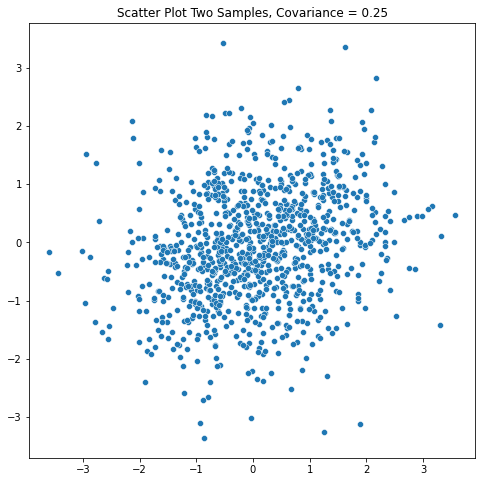

In [3]:
plt.rcParams['figure.figsize'] =  [8, 8]

sns.scatterplot(x=batch_0, y=batch_1)
plt.title(f"scatter plot two samples, covariance = {cov:.2f}".title())
plt.show()

### Q5
* Evaluating the integral over the Gaussian density function:

In [4]:
N = 1_000
cov_mat = np.cov(batch_0, batch_1)
denom = 2 * np.pi * np.sqrt(np.linalg.det(cov_mat))

x_y_vals = []
xs = [0, 1]

dx = 1 / N
dy = 1 / N * (2*xs[1] - 2*xs[0])

for x_i in range(N+1):
    x = xs[0] + dx * x_i
    ys = 2 * int(x / dy) + 1
    for y_i in range(ys):
        y = dy * y_i
        x_y_vals.append((x,y))

all_pdfs_sum = (1/denom * np.exp( -1/2 * (x_y_vals @ np.linalg.inv(cov_mat) * x_y_vals).sum(axis=1))).sum() * dx * dy 

print(f"{all_pdfs_sum*100:.1f}% of the samples fall in the region A using this method")

9.9% of the samples fall in the region A using this method


    2. By estimating the fraction of samples in 4 that falls in the region $A$

In [5]:
zipped = zip(batch_0, batch_1)
filtered_zipped = [(x,y) for x,y in zipped if 0<x<1 and 0<y<2*x]
print(f"There are {len(filtered_zipped)} pairs in the aforementioned sample that fits the criteria. \n" )
print(f"Meaning, {len(filtered_zipped)/len(batch_0)*100:.1f}% of the samples fall in the region A using this method")

There are 112 pairs in the aforementioned sample that fits the criteria. 

Meaning, 11.2% of the samples fall in the region A using this method


## Problem 2 (Conditional Distribution)
$\newcommand{\ex}{\mathbb E}$


For
$$
\begin{bmatrix}
X \\
Y \\
Z 
\end{bmatrix} \sim \Ncal\left( \begin{bmatrix} 1 \\
2\\
3
\end{bmatrix}, \begin{bmatrix}
 4 & 1 & 3 \\
 1 & 2 & 3 \\
 3 & 3 & 8
\end{bmatrix}
\right)
$$
find (numerically):
1. The distribution of $X$ given that $Y = 1$.
2. The joint distribution of $X$ and $Y$ given $Z = 1$.
3. The distribution of $Y$ given that $Z = 2$ and $X = 3$.
4. $Pr(Y \in [-1,1] | Z=2, X=3)$
<hr>
<hr>

#### Q1

In [6]:
all_mu = np.array([1,2,3])
all_cov_mat = np.array([[4, 1, 3],
                       [1, 2, 3],
                       [3, 3, 8]])
N = 10_000_000
samples = np.random.multivariate_normal(mean = all_mu, cov = all_cov_mat, size = N)
# x_y_cov = np.array [[4, 1
#                      1, 2]]
# x_y_mu = np.array([1,2])
x_samples = samples[:,0]
y_samples = samples[:,1]
z_samples = samples[:,2]

x_y_zip = zip(x_samples, y_samples)
x_given_y = [x for x,y in x_y_zip if abs(y - 1.0) < .01]

print(f"Numerically, X given Y=1 distributes normally with a mean of ({np.mean(x_given_y):.2f} and variance of {np.var(x_given_y):.2f})")

Numerically, X given Y=1 distributes normally with a mean of (0.51 and variance of 3.50)


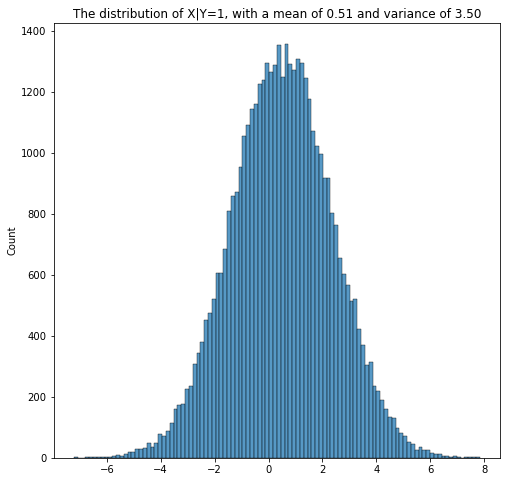

In [7]:
sns.histplot(x_given_y)
plt.title(f"The distribution of X|Y=1, with a mean of {np.mean(x_given_y):.2f} and variance of {np.var(x_given_y):.2f}")
plt.show()

### Q2

In [8]:
x_y_z_zipped = zip(x_samples, y_samples, z_samples)
x_y_given_z = np.array([(x,y) for x,y,z in x_y_z_zipped if abs(z - 1.0) < .01])
# x_vals, y_vals = [comb[0] for comb in x_y_given_z], [comb[1] for comb in x_y_given_z]
x_vals, y_vals = x_y_given_z[:,0], x_y_given_z[:,1]

x_y_cov_mat = np.cov(x_vals, y_vals)
x_y_mu = np.array(np.mean(x_vals), np.mean(y_vals))



In [9]:
print(f"Numerically, X,Y|Z=1 is a Bivariate Nomral distribution with a mean vector of {x_y_mu.T:.2f} and covariance matrix of {x_y_cov_mat}")
print(f"Specifically, the variance of x is {x_y_cov_mat[0][0]:.2f}, the variance of y is {x_y_cov_mat[1][1]:.2f} and the covariance between x and y is {x_y_cov_mat[0][1]:.2f}")


Numerically, X,Y|Z=1 is a Bivariate Nomral distribution with a mean vector of 0.25 and covariance matrix of [[ 2.8600279  -0.12502385]
 [-0.12502385  0.86716796]]
Specifically, the variance of x is 2.86, the variance of y is 0.87 and the covariance between x and y is -0.13


/Users/mymac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


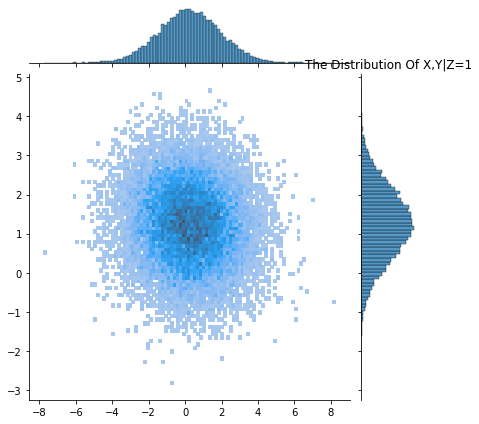

In [10]:
sns.jointplot(x_vals, y_vals, kind='hist')
plt.title("the distribution of X,Y|Z=1".title())
plt.show()

### Q3

In [11]:
x_y_z_zipped = zip(x_samples, y_samples, z_samples)
y_given_x_z = [y for x,y,z in x_y_z_zipped if (abs(2 - z) < 0.1 and abs(3-x) < 0.1)]
y_given_x_z_mean, y_given_x_z_var = np.mean(y_given_x_z), np.var(y_given_x_z)
print(f"Y given Z=2 and X=3 distributes normally with a a mean of {y_given_x_z_mean:.2f} and variance of {y_given_x_z_var:.2f}")

Y given Z=2 and X=3 distributes normally with a a mean of 1.50 and variance of 0.87


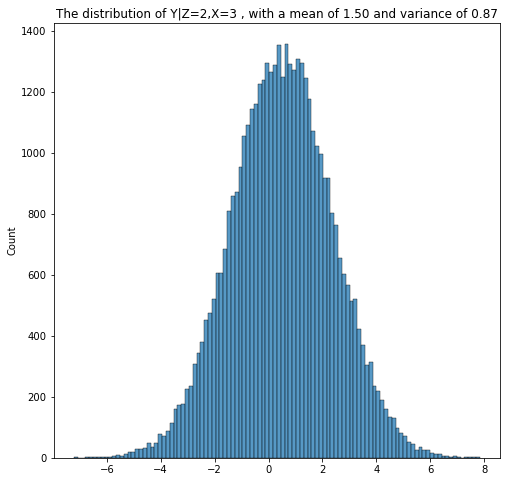

In [12]:
sns.histplot(x_given_y)
plt.title(f"The distribution of Y|Z=2,X=3 , with a mean of {y_given_x_z_mean:.2f} and variance of {y_given_x_z_var:.2f}")
plt.show()

### Q4

In [13]:
y_in_range = [y for y in y_given_x_z if y>=-1 and y <=1]
print(f"Numerically, the probabiliy Y is in the range of [-1, 1] is {len(y_in_range)/len(y_given_x_z):.2f}")

Numerically, the probabiliy Y is in the range of [-1, 1] is 0.30


We can varify the answer using the normal library, using our already calculated mean and variance:

In [14]:
y_dist = st.norm(loc=y_given_x_z_mean, scale=y_given_x_z_var)
prob = y_dist.cdf(1) - y_dist.cdf(-1)
print(f"Theoretically, the probably Y is in the rage of [-1, 1] is {prob:.2f}")

Theoretically, the probably Y is in the rage of [-1, 1] is 0.28


## Problem 3 (Distributional Properties of Least Squares)
Cosnider a least squares model with one predcitor $p=1$ without an intercept term, i.e. $y_i = \beta x_i + \epsilon_i$, $i=1,\ldots,n$.
1. Write the least squares solution $\hat{\beta} \in \mathbb R$ in terms of $x = (x_1,\ldots,x_n)^\top$ and $y = (y_1,\ldots,y_n)^\top$.
2. With $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$, show that
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0$
 - $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
3. Suppose that $\epsilon_i \sim N(0, 1)$. 
 - What is the distribution of the random vector $[ \hat{\epsilon}~~ \hat{y}]^\top$?
 - What is the distribution of the random vector $[\hat{y}~~ \hat{\beta}]^\top$?
4. Set $\|\epsilon\|_{\infty} := \max_{i=1}^n |\epsilon_i|$. What is $Pr( \|\hat{\epsilon}\|_{\infty} > 2)$? is it larger or smaller than $Pr(\|\epsilon\|_{\infty}  > 2)$? (the point, we want to know if the predicted residuals tend to have less or more extreme values than the true ones)

<hr>
<hr>


### Q1

The least squares solution holds that $\hat{\beta} = (Z{^\top}Z)^{-1}Z{^\top}y$. In our data we know that $Z = (x_1,\ldots,x_n)^\top$ and that $y = (y_1,\ldots,y_n)^\top$.
Hence, $$
\hat{\beta} = [(x_1,\ldots,x_n) \cdot (x_1,\ldots,x_n)^\top]^{-1} \cdot (y_1,\ldots,y_n)^\top
$$

2. With $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$, show that
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0$
 - $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$

### Q2

1. $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = \sum_{i=1}^n \hat{\beta}x_i \cdot \hat{\epsilon}_i =  
\hat{\beta} \sum_{i=1}^n x_i \cdot \hat{\epsilon}_i$

When finding $\hat{\beta}$ we derived $\sum_{i=1}^n y_i - \beta x_i - \epsilon$ by $\beta$ and saw that $\sum_{i=1}^n x_i \cdot \hat{\epsilon}_i = 0$. Plug it in to the above equation and 
$ \sum_{i=1}^n \hat{\beta} \sum_{i=1}^n x_i \cdot \hat{\epsilon}_i =  \sum_{i=1}^n \hat{\beta} \cdot 0 = 0$ 

$QED$


2. $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
From the first section in this q, we know that $\hat{y}^T \hat{\epsilon} = 0$, meaning $\hat{y}^T(y-\hat{y})= \hat{y}^T y - \hat{y}^T \hat{y} = 0$. <br>
Moving sides and $\hat{y}^T y = \hat{y}^T \hat{y}$. After transposing both parts we get $y^T\hat{y} = \hat{y}^T\hat{y}$.

$$\|\hat{\epsilon}\|^2 = \hat{\epsilon}^T\hat{\epsilon} = (y-\hat{y})^T\hat{\epsilon} = y^T\hat{\epsilon} \hat{y}^T\hat{\epsilon} = y^T(y-\hat{y}) = y^Ty - y^T\hat{y}$$ <br>

Plugging in $y^T\hat{y} = \hat{y}^T\hat{y}$:


$$y^Ty - \hat{y}^T\hat{y} = \|y\|^2 - \|\hat{y}\|^2 $$

$QED$


### Q3

1. Since $cov(\hat{\epsilon}, \hat{y}) = 0$, meaning, they are independent, we can say that:
$$ [ \hat{\epsilon}, \hat{y}]^\top \sim \Ncal[(0,Z\beta)^\top, \begin{bmatrix} 1 & 0 \\
0 & \sigma^2I_n
\end{bmatrix}]
$$

2. Since we know that $\hat{\beta} = x^T\hat{\beta}$, we can calculate the covarinace:
$$ cov(\hat{y},\hat{\beta}) = cov(x^\top \hat{\beta}, \hat{\beta}) = cov(\hat{\beta}, \hat{\beta}) x = var( \hat{\beta}) x
$$
Since $var(\hat{\beta}) = \sigma^2(x^Tx)^-1 $, and $\sigma^2 = 1$ we can plug in and get 
$$
cov(\hat{y},\hat{\beta}) = (x^Tx)^-1 x
$$
And thus:
$$[\hat{y}~~ \hat{\beta}]^\top \sim \Ncal[(Z\beta, \beta)^\top, \begin{bmatrix} \sigma^2I_n & (x^Tx)^-1 x \\
((x^Tx)^-1 x)^T & (x^Tx)^-1
\end{bmatrix}]
$$

### Q4
We know that $\epsilon_i \sim N(0, 1)$ and the $\hat{\epsilon}_i \sim N(0, I-H)$.
If $I-H > 1$, then $Pr( \|\hat{\epsilon}\|_{\infty} > 2) > Pr(\|\epsilon\|_{\infty}  > 2)$ and vice versa.

## Problem 4 (Model fitting and t-Test)
Cosnider the house prices dataset from the EDA notebook, which you can obtain from kaggle via:

In [15]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!mkdir house-prices
!unzip house-prices-advanced-regression-techniques.zip -d house-prices/

Traceback (most recent call last):
  File "/Users/mymac/opt/anaconda3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/mymac/opt/anaconda3/lib/python3.8/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/Users/mymac/opt/anaconda3/lib/python3.8/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /Users/mymac/.kaggle. Or use the environment method.
mkdir: house-prices: File exists
unzip:  cannot find or open house-prices-advanced-regression-techniques.zip, house-prices-advanced-regression-techniques.zip.zip or house-prices-advanced-regression-techniques.zip.ZIP.


Only consider houses of lot size smaller than $15,000$ square feet, e.g. by using

In [16]:
import pandas as pd
data_raw = pd.read_csv("house-prices/train.csv")
data = data_raw[data_raw.LotArea < 15000]  # we focus on small lots

Consider predicting ``SalePrice`` via a linear model with predictors:

In [17]:
feat_set1 = ['LotArea',  'YearBuilt', 'YrSold', 'GarageCars',
             'FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual']

plus a constant. 

1. Find the least squares estimate $\hat{\beta}$ of this model.
2. Find $R^2$ of this model.
3. For each $\beta_j$, $j=1,\ldots,9$, evaluate the $t$ statistic corresponding to testing 
$$
H_{0j}\,:\, \beta_j=0
$$
and its P-values (identify first the number of degrees of freedom). 
4. Which of these statistics exceeds the $0.975$-th quantile of the corresponding $t$ distribution and below the $0.025$-th quantile? (values exceeding theses quantiles are strong evidence against $H_{0j}$)
5. Consider a smaller model involving only ``LotArea``,  ``YearBuilt``, ``YrSold`` as predictors. Find the least squares estimate of this smaller model and its sum of sqaures. Is this model provides a valid representation of the data compared to the original larger one? Answer your question by evaluating the relevant $F$ statistic and report on the F-test's P-value. 

<hr>
<hr>

### Q1

In [18]:
df = data.copy()
X = df[feat_set1]
y = df['SalePrice'].values
Z = np.c_[np.ones_like(y), X]

beta_hat = np.linalg.inv(Z.T @ Z) @ Z.T @ y

print(f"The LS estimator Beta hat is the vector {[round(b,2) for b in list(beta_hat)]}^T")

The LS estimator Beta hat is the vector [-930539.09, 4.14, 144.33, 271.63, 2796.73, 15624.23, 35.08, 42.14, 25411.43]^T


### Q2

In [19]:
y_hat = Z @ beta_hat
y_bar = np.mean(y)
ss_fit = np.sum((y_hat - y_bar)**2)
ss_tot = np.sum((y - y_bar)**2)

r_squared = ss_fit / ss_tot

print(f"The R^2 of the model is {r_squared:.3f}")

The R^2 of the model is 0.789


In [20]:
n = len(y)
p = len(feat_set1) + 1
dof = n-p
epsilon = (y - y_hat)
s = np.sqrt((np.linalg.norm(epsilon) ** 2) / dof)

p_vals = []

for i in range(len(beta_hat)):
    c = np.zeros(p)
    c[i] = 1
    t_stat = (beta_hat[i] - 0) / (s * np.sqrt(c.T @ np.linalg.inv(Z.T @ Z) @ c))
    p_val = 2 * (1 - st.t.cdf(t_stat, df=dof))
    p_vals.append(p_val)
    print(f"The t statistic p value for beta hat {i} is {p_val:.4f}")    

The t statistic p value for beta hat 0 is 1.4989
The t statistic p value for beta hat 1 is 0.0000
The t statistic p value for beta hat 2 is 0.0004
The t statistic p value for beta hat 3 is 0.6930
The t statistic p value for beta hat 4 is 0.3210
The t statistic p value for beta hat 5 is 0.0000
The t statistic p value for beta hat 6 is 0.0000
The t statistic p value for beta hat 7 is 0.0000
The t statistic p value for beta hat 8 is 0.0000


In [21]:
indices_p_vals_zipped = zip(range(len(beta_hat)), p_vals)
indices_filtered = [index for index,p_val in indices_p_vals_zipped if (0.975 < p_val or p_val < 0.025) and p_val < 1]
print(f"The betas that meet this condition are {indices_filtered}")

The betas that meet this condition are [1, 2, 5, 6, 7, 8]


### Q4

In [22]:
feat_set_sub = ['LotArea', 'YearBuilt', 'YrSold']
X_sub = df[feat_set_sub]
Z_sub = np.c_[np.ones_like(y), X_sub]

beta_hat_sub = np.linalg.inv(Z_sub.T @ Z_sub) @ Z_sub.T @ y

print(f"The LS estimator Beta hat squig is the vector {[round(b,2) for b in list(beta_hat_sub)]}^T")

The LS estimator Beta hat squig is the vector [-2544714.28, 9.07, 1299.56, 38.16]^T


In [23]:
y_hat_sub = Z_sub @ beta_hat_sub
ss_fit_sub = np.sum((y_hat_sub - y_bar)**2)
ss_tot_sub = np.sum((y - y_bar)**2)

ss_sub = ss_tot_sub - ss_fit_sub
r_squared_sub = ss_fit_sub / ss_tot_sub


print(f"The SS of the smaller model is {ss_tot_sub - ss_fit_sub:.3f}")
print(f"The R^2 of the smaller model is {r_squared_sub:.3f}")

The SS of the smaller model is 3637040226479.570
The R^2 of the smaller model is 0.476


In [24]:
ss_full = ss_tot - ss_fit
q = len(feat_set_sub) + 1

F = ((1/(p-q)) * (ss_sub - ss_full)) / (ss_full / dof)
p_val_f = 2 * (1 - st.f.cdf(F, dfn=p-q, dfd=dof))
print(f"The p value of the F-test is {p_val_f:.4f}. \n Meaning, we cannot say that the smaller model is significantly better than the larger model. \n Hence it does not provide a valid representation of the data, compared to the larger model.")

The p value of the F-test is 0.0000. 
 Meaning, we cannot say that the smaller model is significantly better than the larger model. 
 Hence it does not provide a valid representation of the data, compared to the larger model.
